In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('E:\DataScience\datasets\SCMA2023')

In [3]:
nss = pd.read_csv("NSSO68.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# As the total expenditure increases the proportion spent on cereals decrease

In [5]:
# Classification of Monthly Per Capita Expenditure
#Very Low
#Low
#Medium
#High
#Very High
# Proportion of expenditure towards cereals should decline and expenditure towards high value products (milk, meat, fruit and v
# vegetable should increase)

In [6]:
np.percentile(nss['MPCE_MRP'], [20,40,60,80])

array([ 969.524, 1320.41 , 1793.146, 2717.124])

In [ ]:
nss['MPCE_MRP'].perce

In [11]:
def mpce_cat(vals):
    if vals < 969:
        return 'Very Low'
    if vals < 1320:
        return 'Low'
    if vals < 1793:
        return 'Medium'
    if vals < 2717:
        return 'High'
    else:
        return 'Very High'

In [9]:
list(nss)

['Unnamed: 0',
 'grp',
 'Round_Centre',
 'FSU_number',
 'Round',
 'Schedule_Number',
 'Sample',
 'Sector',
 'state',
 'State_Region',
 'District',
 'Stratum_Number',
 'Sub_Stratum',
 'Schedule_type',
 'Sub_Round',
 'Sub_Sample',
 'FOD_Sub_Region',
 'Hamlet_Group_Sub_Block',
 'Second',
 'X_Stage_Stratum',
 'HHS_No',
 'Level',
 'Filler',
 'hhdsz',
 'NIC_2008',
 'NCO_2004',
 'HH_type',
 'Religion',
 'Social_Group',
 'Whether_owns_any_land',
 'Type_of_land_owned',
 'Land_Owned',
 'Land_Leased_in',
 'Otherwise_possessed',
 'Land_Leased_out',
 'Land_Total_possessed',
 'During_July_June_Cultivated',
 'During_July_June_Irrigated',
 'NSS',
 'NSC',
 'MLT',
 'land_tt',
 'Cooking_code',
 'Lighting_code',
 'Dwelling_unit_code',
 'Regular_salary_earner',
 'Perform_Ceremony',
 'Meals_seved_to_non_hhld_members',
 'Possess_ration_card',
 'Type_of_ration_card',
 'MPCE_URP',
 'MPCE_MRP',
 'Person_Srl_No',
 'Relation',
 'Sex',
 'Age',
 'Marital_Status',
 'Education',
 'Days_Stayed_away',
 'No_of_Meals_per

In [12]:
nss['mpce_cat'] = nss['MPCE_MRP'].apply(mpce_cat)

In [13]:
nss['mpce_cat'].unique()

array(['Very High', 'High', 'Low', 'Medium', 'Very Low'], dtype=object)

In [14]:
nss.groupby('mpce_cat')['cerealstt_v','pulsestt_v','edibletotal_v','milkprott_v','fv_tot','emftt_v'].mean()

,cerealstt_v,pulsestt_v,edibletotal_v,milkprott_v,fv_tot,emftt_v
mpce_cat,,,,,,
High,196.518907,56.138771,65.345316,198.576993,124.716676,84.916728
Low,158.819315,40.413680,47.632083,93.907423,75.247171,47.159753
Medium,177.963748,47.731462,56.116125,138.824033,94.994981,64.045975
Very High,225.173530,73.453165,81.065982,315.360114,197.476697,128.370169
Very Low,132.287125,30.727422,36.386027,45.733804,56.556754,28.495950


In [15]:
food = nss.groupby('mpce_cat')['cerealstt_v','pulsestt_v','edibletotal_v','milkprott_v','fv_tot','emftt_v'].mean()

In [17]:
food.sort_values('emftt_v', inplace=True)

In [21]:
food= food.T

In [22]:
food

mpce_cat,Very Low,Low,Medium,High,Very High
cerealstt_v,132.287125,158.819315,177.963748,196.518907,225.173530
pulsestt_v,30.727422,40.413680,47.731462,56.138771,73.453165
edibletotal_v,36.386027,47.632083,56.116125,65.345316,81.065982
milkprott_v,45.733804,93.907423,138.824033,198.576993,315.360114
fv_tot,56.556754,75.247171,94.994981,124.716676,197.476697
emftt_v,28.495950,47.159753,64.045975,84.916728,128.370169


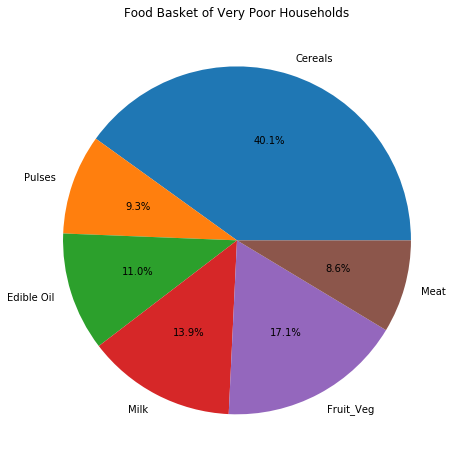

In [33]:
labels = ['Cereals', 'Pulses', 'Edible Oil', 'Milk', 'Fruit_Veg', 'Meat']
plt.figure(figsize=(12,8))
plt.pie(food['Very Low'], labels=labels, autopct='%1.1f%%');
plt.title('Food Basket of Very Poor Households');

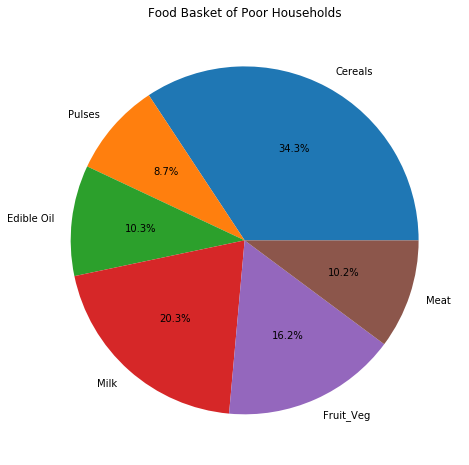

In [34]:
plt.figure(figsize=(12,8))
plt.pie(food['Low'], labels=labels, autopct='%1.1f%%');
plt.title('Food Basket of Poor Households');

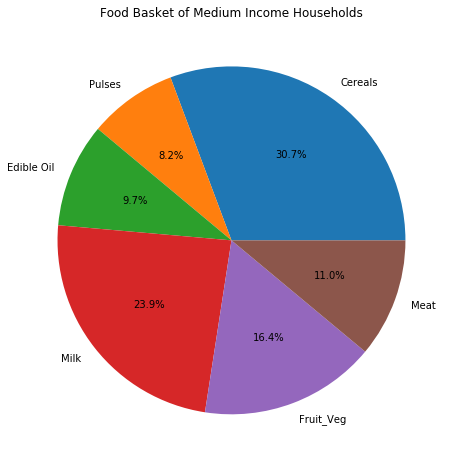

In [35]:
plt.figure(figsize=(12,8))
plt.pie(food['Medium'], labels=labels, autopct='%1.1f%%');
plt.title('Food Basket of Medium Income Households');

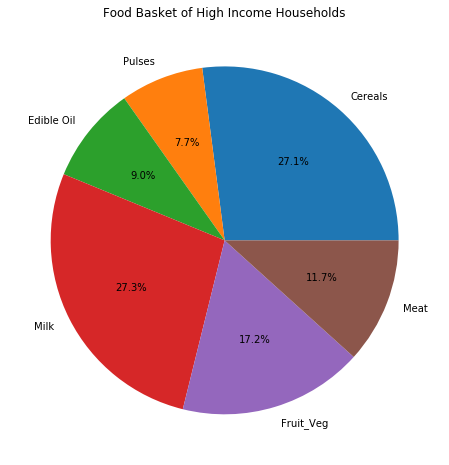

In [36]:
plt.figure(figsize=(12,8))
plt.pie(food['High'], labels=labels, autopct='%1.1f%%');
plt.title('Food Basket of High Income Households');

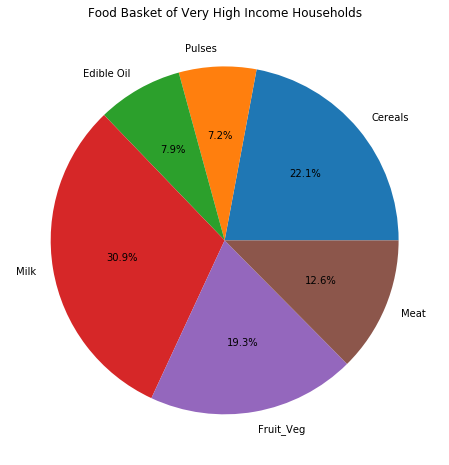

In [37]:
plt.figure(figsize=(12,8))
plt.pie(food['Very High'], labels=labels, autopct='%1.1f%%');
plt.title('Food Basket of Very High Income Households');

In [38]:
from matplotlib.backends.backend_pdf import PdfPages

In [39]:
food.columns

Index(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype='object', name='mpce_cat')

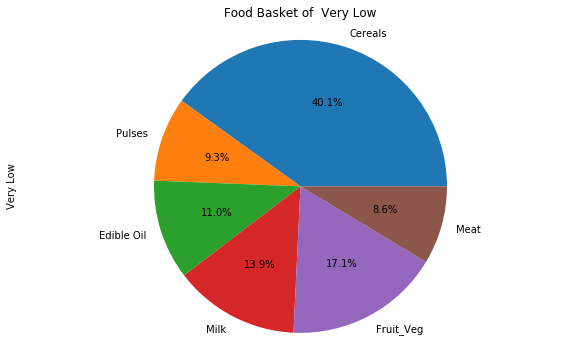

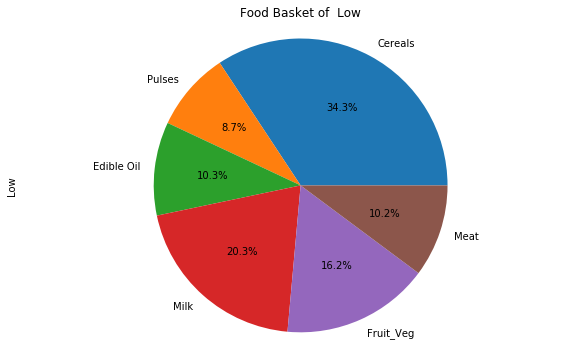

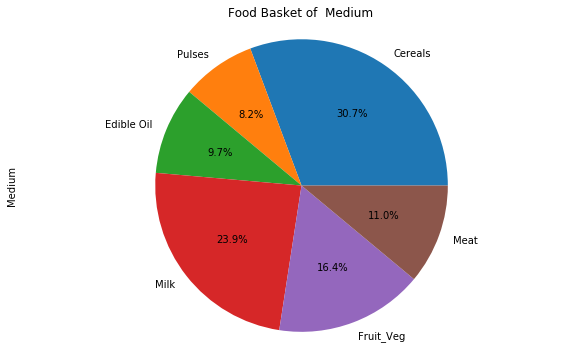

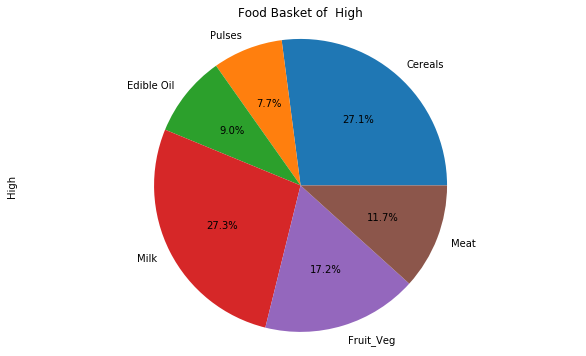

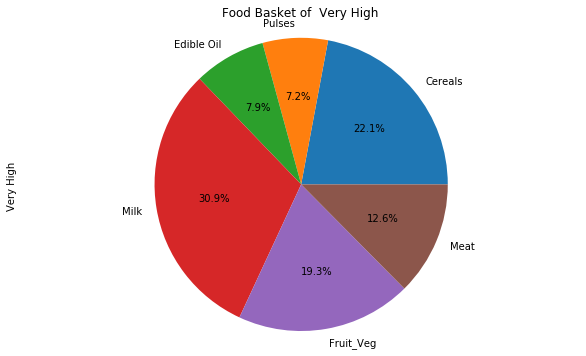

In [44]:
labels = ['Cereals', 'Pulses', 'Edible Oil', 'Milk', 'Fruit_Veg', 'Meat']
with PdfPages ('FoodBasket.pdf') as pdf:
    for i in food.columns:
        fig, ax = plt.subplots(figsize=(10,6))
        prop = round(food[i]/food[i].sum()*100,0)
        fig = food[i].plot.pie(labels=labels, autopct='%1.1f%%').get_figure()
        title = 'Food Basket of '+' '+i
        ax.set_title(title)
        ax.axis('equal')
        pdf.savefig(fig)

In [74]:
food_state = nss.groupby('state_1')['cerealstt_v','pulsestt_v','edibletotal_v','milkprott_v','fv_tot','emftt_v'].mean()

In [77]:
food_state = food_state.T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

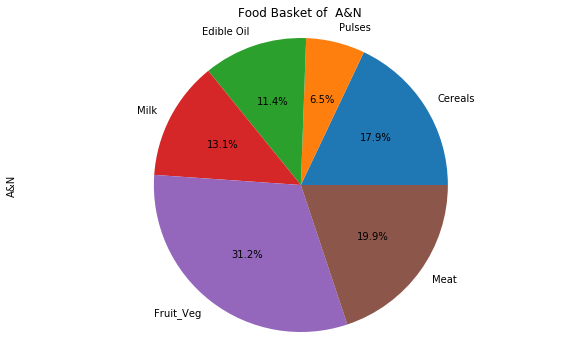

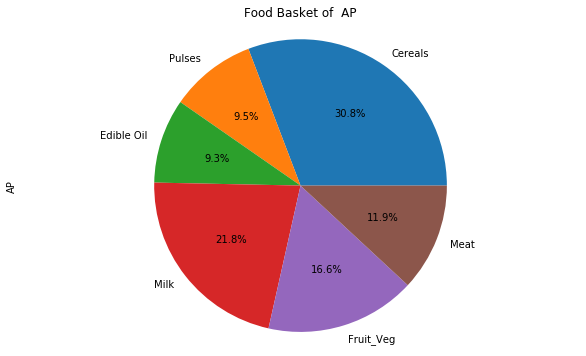

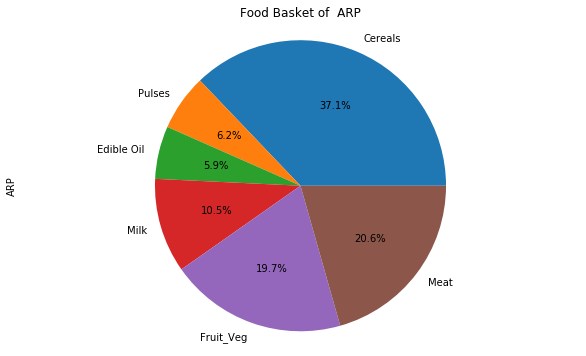

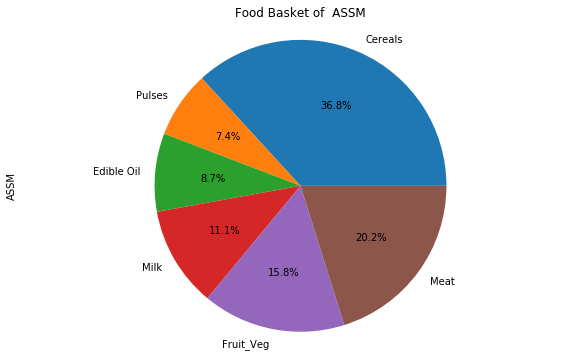

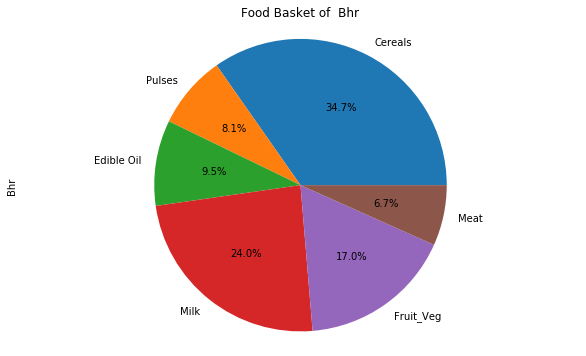

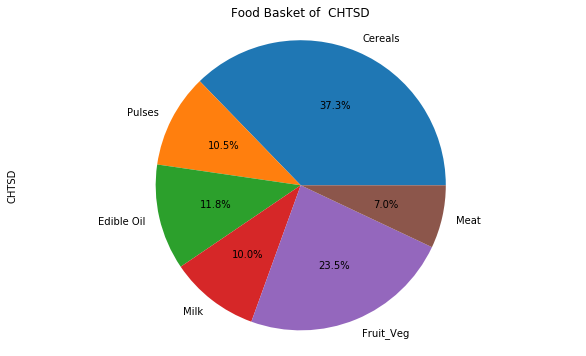

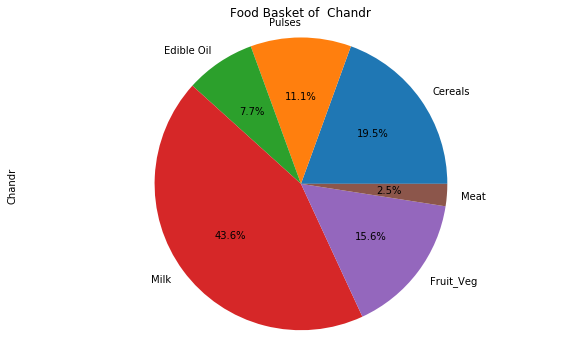

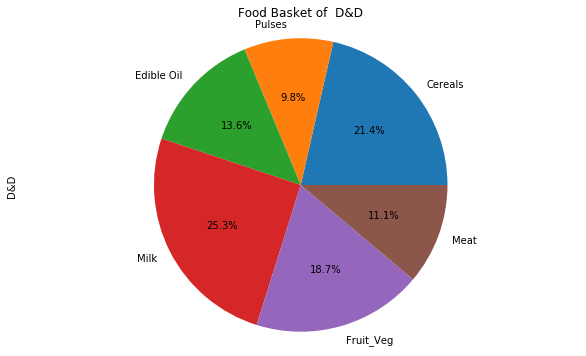

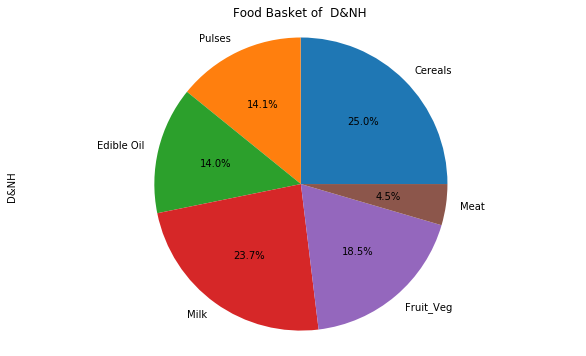

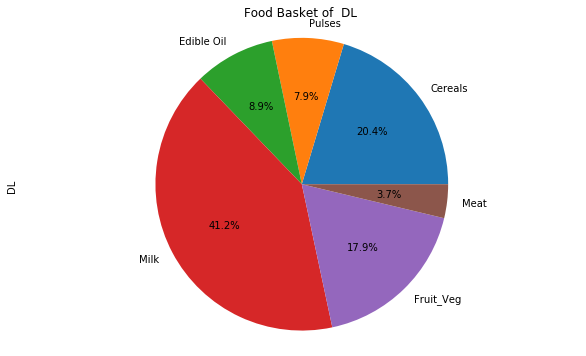

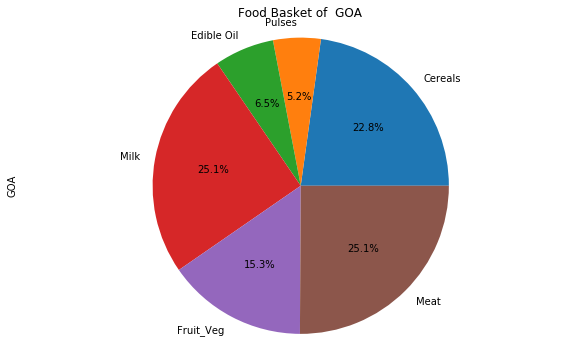

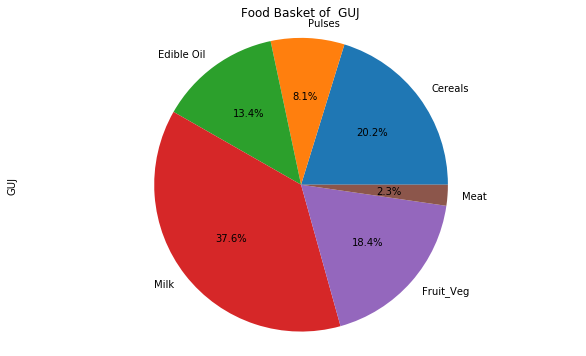

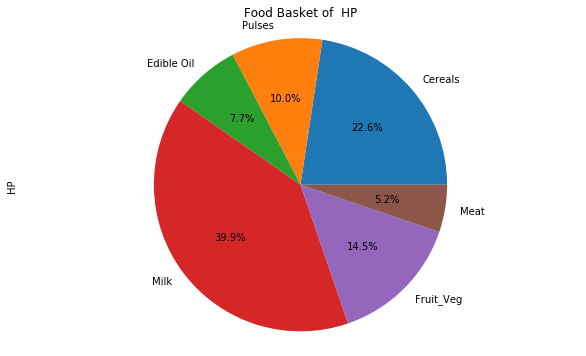

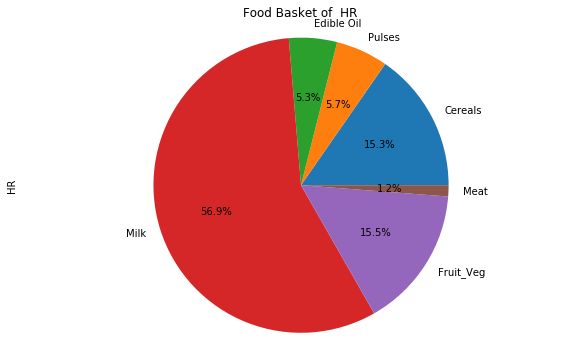

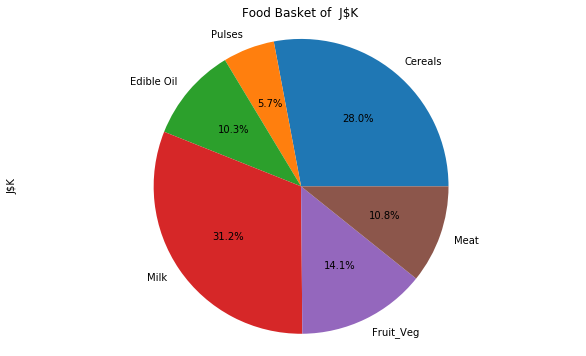

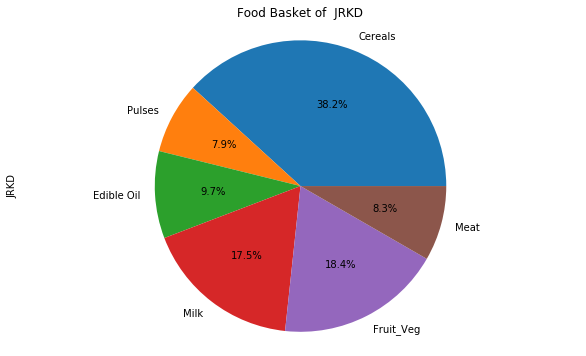

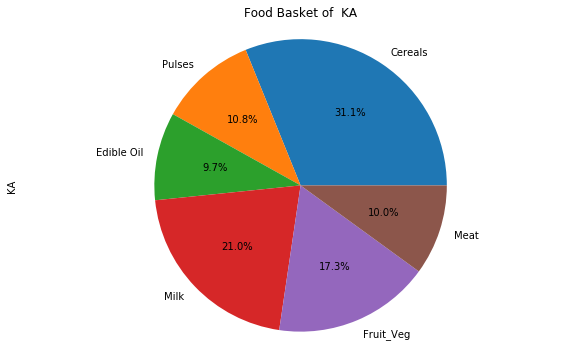

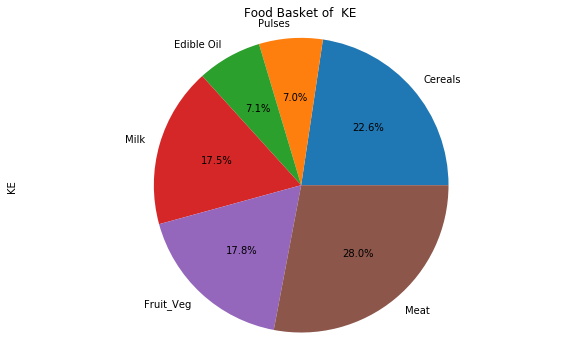

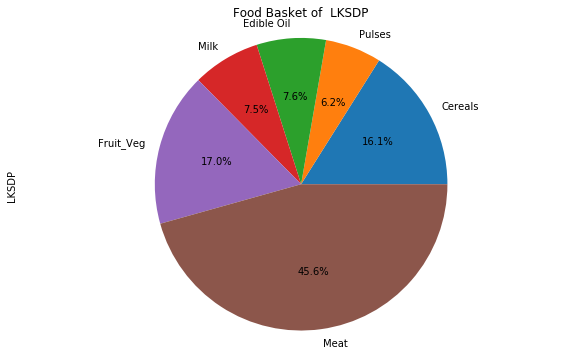

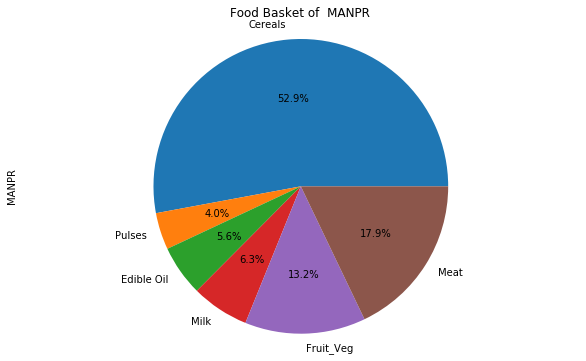

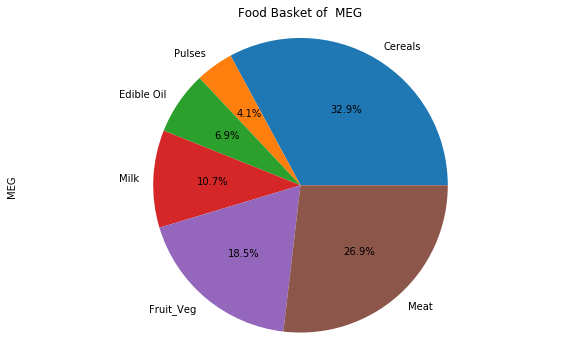

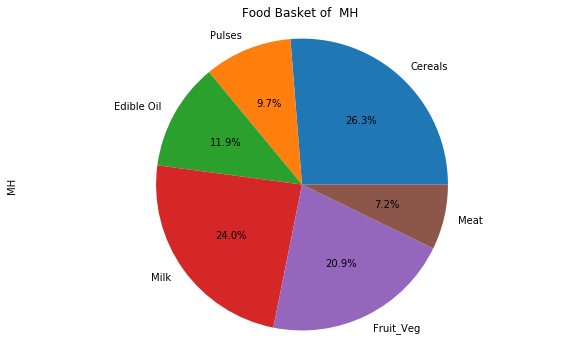

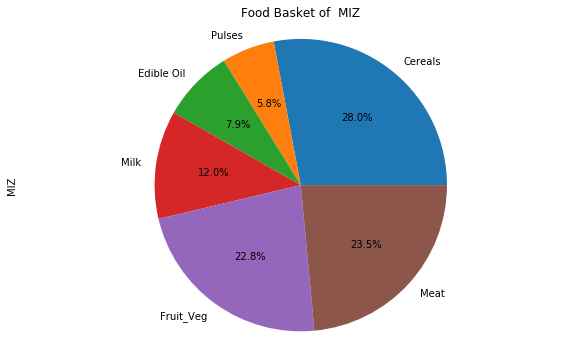

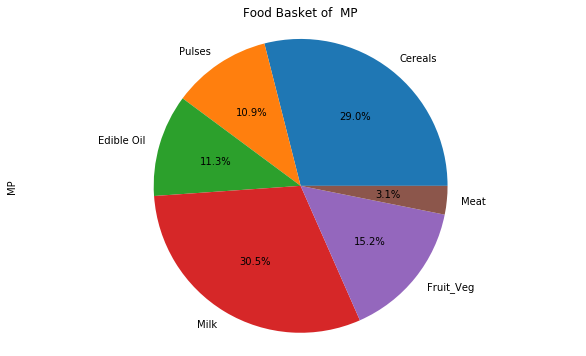

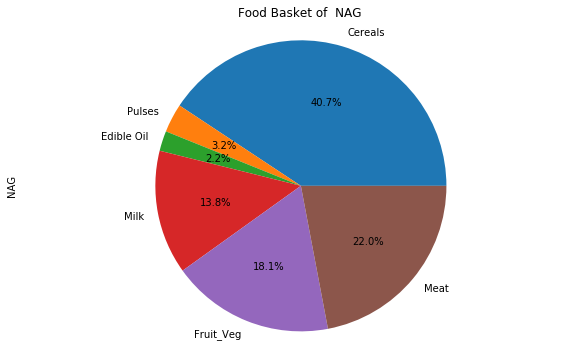

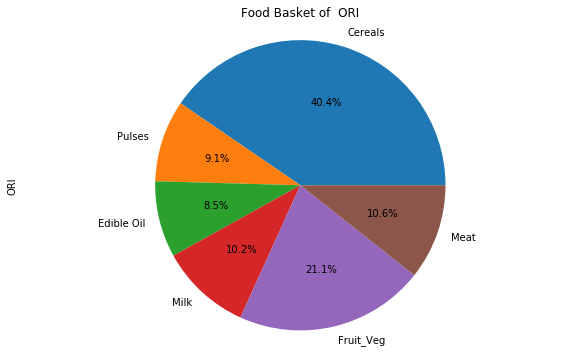

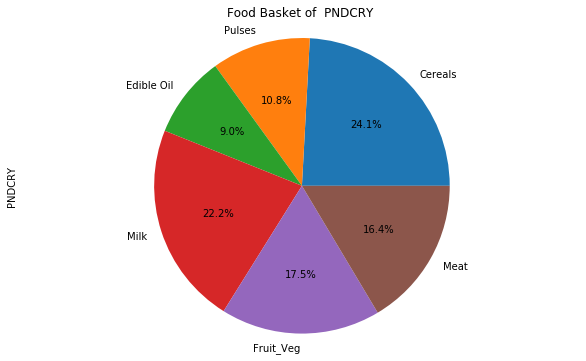

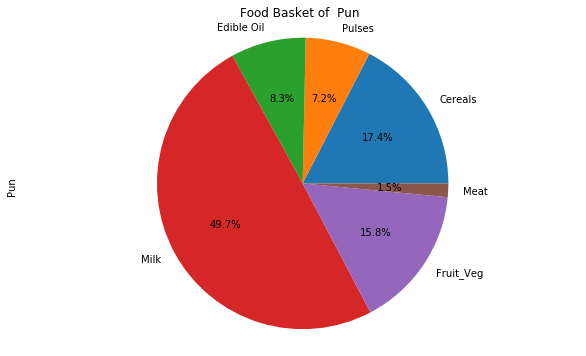

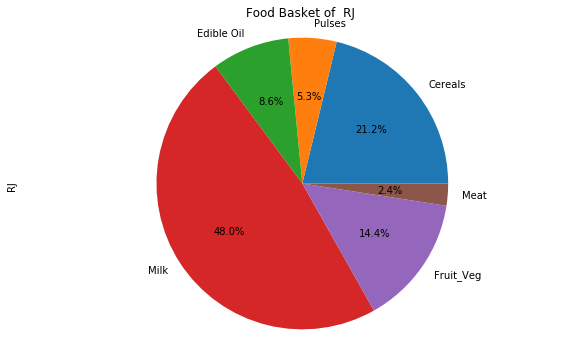

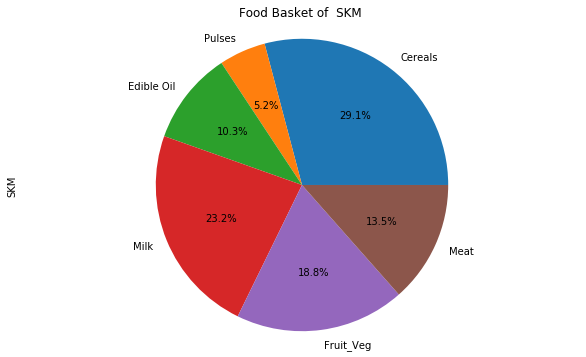

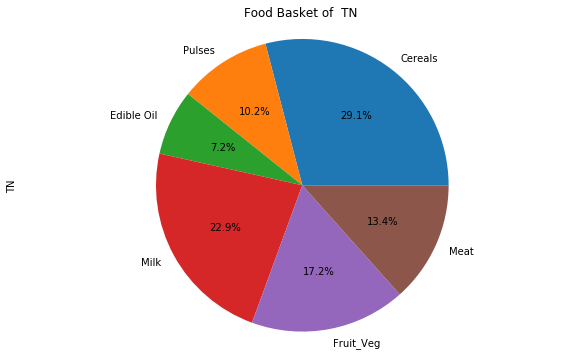

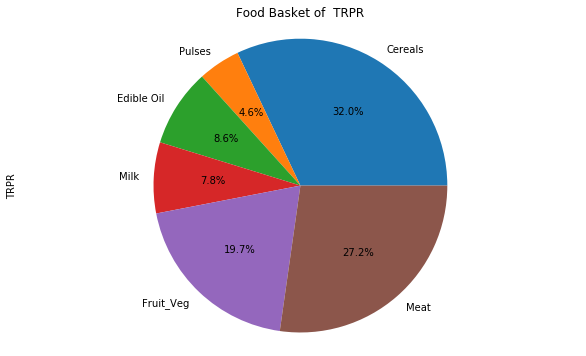

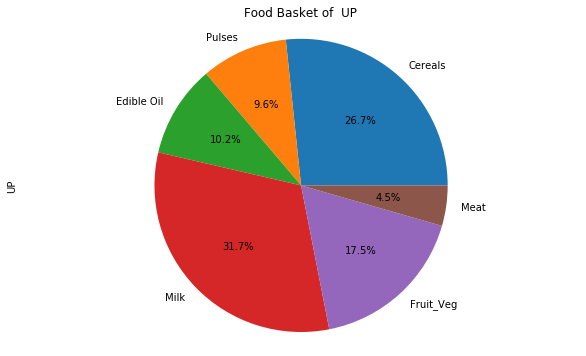

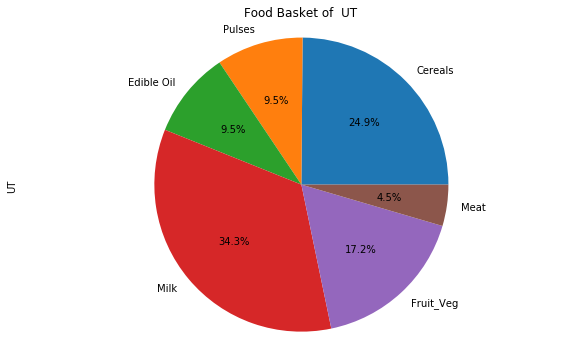

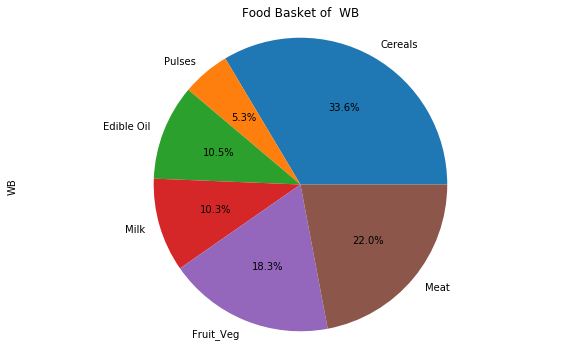

In [80]:
labels = ['Cereals', 'Pulses', 'Edible Oil', 'Milk', 'Fruit_Veg', 'Meat']
with PdfPages ('FoodBasket_state.pdf') as pdf:
    for i in food_state.columns:
        fig, ax = plt.subplots(figsize=(10,6))
        prop = round(food_state[i]/food_state[i].sum()*100,0)
        fig = food_state[i].plot.pie(labels=labels, autopct='%1.1f%%').get_figure()
        title = 'Food Basket of '+' '+i
        ax.set_title(title)
        ax.axis('equal')
        pdf.savefig(fig)

In [46]:
bank = pd.read_excel('E:\\Christ\\2021\\Dataset\\BANKS2020DATA.xlsx')

In [47]:
bank.head()

,Bank,Year,Sector,EquityShareCapital,ReservesandSurplus,TotalReservesandSurplus,TotalShareHoldersFunds,Deposits,Borrowings,OtherLiabilitiesandProvisions,...,TransferTo_FromStatutoryReserve,TransferTo_FromCapitalReserve,TransferTo_FromInvestmentReserve,TransferTo_FromRevenueAndOtherReserves,DividendandDividendTaxforThePreviousYear,BalanceCarriedOverToBalanceSheet,TotalAppropriations,BasicEPS(Rs.),DilutedEPS(Rs.),Unnamed: 60
0,ICICI Bank,2020,Private,1294.76,112091.29,115206.16,116504.41,770968.99,162896.76,47994.99,...,1982.80,395.44,669.00,0.0,645.31,21327.47,25810.38,12.28,12.08,NaN
1,ICICI Bank,2019,Private,1294.76,115206.16,115206.16,116507.90,770968.99,162896.76,47994.99,...,840.90,28.00,1269.20,350.0,0.00,17879.57,21858.56,5.23,5.17,NaN
2,ICICI Bank,2018,Private,1289.46,104029.40,107073.91,108368.04,652919.67,165319.97,37851.46,...,1694.40,2565.46,0.00,700.0,0.00,18495.26,25522.36,10.56,10.46,NaN
3,ICICI Bank,2017,Private,1294.14,107073.91,107073.91,108368.05,652919.67,165319.97,37851.46,...,2450.30,5293.30,0.00,0.0,-6.24,18744.94,26933.28,16.84,16.77,NaN
4,HDFC Bank,2020,Private,548.33,170437.69,170437.69,170986.02,1147502.31,144628.54,67394.40,...,5269.54,105.34,2107.82,773.0,0.00,49223.30,61531.58,78.65,77.87,NaN


In [48]:
from scipy.stats import pearsonr

In [49]:
list(bank)

['Bank',
 'Year',
 'Sector',
 'EquityShareCapital',
 'ReservesandSurplus',
 'TotalReservesandSurplus',
 'TotalShareHoldersFunds',
 'Deposits',
 'Borrowings',
 'OtherLiabilitiesandProvisions',
 'TotalCapitalandLiabilities',
 'CashandBalanceswithReserveBankofIndia',
 'BalanceswithBanksMoneyatCallandShortNotice',
 'Investments',
 'Advances',
 'FixedAssets',
 'OtherAssets',
 'TotalAssets',
 'NumberofBranches',
 'NumberofEmployees',
 'CapitalAdequacyRatios(%)',
 'Tier1(%)',
 'Tier2(%)',
 'GrossNPA',
 'GrossNPA(%)',
 'NetNPA',
 'NetNPA(%)',
 'NetNPAToAdvances(%)',
 'BillsforCollection',
 'ContingentLiabilities',
 'Interest_DiscountonAdvances_Bills',
 'IncomefromInvestments',
 'InterestonBalancewithRBIandOtherInter-Bankfunds',
 'Others',
 'TotalInterestEarned',
 'OtherIncome',
 'TotalIncome',
 'InterestExpended',
 'PaymentstoandProvisionsforEmployees',
 'Depreciation',
 'OperatingExpenses(excludesEmployeeCost&Depreciation)',
 'TotalOperatingExpenses',
 'ProvisionTowardsIncomeTax',
 'Provision

In [51]:
r = pearsonr(bank['Deposits'],bank['Borrowings'])

In [52]:
r

(0.9004728488377399, 4.012647031669571e-40)

In [53]:
r = pearsonr(bank['Investments'],bank['Advances'])

In [54]:
r

(0.9848498952864789, 1.7233096241327185e-82)

In [55]:
r = pearsonr(bank['NetNPA'], bank['NetProfit_LossforTheYear'])

In [56]:
r

(0.08212026208647462, 0.3981574158856174)

In [57]:
bank.Year.unique()

array([2020, 2019, 2018, 2017], dtype=int64)

In [58]:
bank20 = bank[bank['Year']==2020]

In [59]:
r = pearsonr(bank20['NetNPA'], bank20['NetProfit_LossforTheYear'])
r

(-0.08594216090220243, 0.6699419644144494)

In [61]:
r = pearsonr(bank20['Deposits'], bank20['Borrowings'])
r

(0.8804753715220968, 1.3993315737042706e-09)

In [62]:
bank_20_new = bank20[['NetNPA','Deposits','Borrowings','Advances']]

In [63]:
corr_matrix = bank_20_new.corr()

In [64]:
corr_matrix

,NetNPA,Deposits,Borrowings,Advances
NetNPA,1.000000,0.079099,0.033892,0.068179
Deposits,0.079099,1.000000,0.880475,0.993885
Borrowings,0.033892,0.880475,1.000000,0.917851
Advances,0.068179,0.993885,0.917851,1.000000


In [71]:
import seaborn as sns

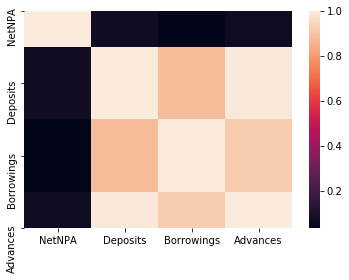

In [73]:
sns.heatmap(corr_matrix);

## REGRESSION

### Simple Linear Regression

In [82]:
# y = a+bx+e
y = bank20['NetProfit_LossforTheYear']
x = bank20['Borrowings']

In [83]:
import statsmodels.api as sm

In [84]:
model1 = sm.OLS(y,x).fit()

In [85]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     NetProfit_LossforTheYear   R-squared (uncentered):                   0.093
Model:                                  OLS   Adj. R-squared (uncentered):              0.058
Method:                       Least Squares   F-statistic:                              2.663
Date:                      Sat, 29 Jun 2024   Prob (F-statistic):                       0.115
Time:                              15:14:19   Log-Likelihood:                         -276.23
No. Observations:                        27   AIC:                                      554.5
Df Residuals:                            26   BIC:                                      555.8
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Borrowings     0.0245      0.015      1.632      0.115      -0.006       0.055
==============================================================================
Omnibus:                       23.160   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.828
Skew:                           1.864   Prob(JB):                     1.01e-08
Kurtosis:                       7.340   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
x = sm.add_constant(x)
model2 = sm.OLS(y,x).fit()
model2.summary()

C:\Users\veda\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetProfit_LossforTheYear   R-squared:                       0.073
Model:                                  OLS   Adj. R-squared:                  0.036
Method:                       Least Squares   F-statistic:                     1.979
Date:                      Sat, 29 Jun 2024   Prob (F-statistic):              0.172
Time:                              15:16:21   Log-Likelihood:                -276.21
No. Observations:                        27   AIC:                             556.4
Df Residuals:                            25   BIC:                             559.0
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -350.3010   1676.425     -0.209      0.836   -3802.963    3102.361
Borrowings     0.0268      0.019      1.407      0.172      -0.012       0.066
==============================================================================
Omnibus:                       22.814   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.066
Skew:                           1.833   Prob(JB):                     1.47e-08
Kurtosis:                       7.315   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Linear Regression

In [114]:
y = bank20['NetProfit_LossforTheYear']
x = bank20[['Borrowings','NetNPA(%)','Deposits','Advances','FixedAssets','NumberofBranches']]

In [115]:
x = sm.add_constant(x)

C:\Users\veda\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [116]:
model3 = sm.OLS(y,x).fit()

In [117]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetProfit_LossforTheYear   R-squared:                       0.604
Model:                                  OLS   Adj. R-squared:                  0.486
Method:                       Least Squares   F-statistic:                     5.090
Date:                      Sat, 29 Jun 2024   Prob (F-statistic):            0.00255
Time:                              15:42:12   Log-Likelihood:                -264.72
No. Observations:                        27   AIC:                             543.4
Df Residuals:                            20   BIC:                             552.5
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.7551   1284.567      0.005      0.996   -2672.805    2686.315
Borrowings          -0.1231      0.073     -1.694      0.106      -0.275       0.028
NetNPA(%)           -0.0023      0.021     -0.110      0.913      -0.047       0.042
Deposits            -0.1032      0.050     -2.084      0.050      -0.207       0.000
Advances             0.1599      0.063      2.541      0.019       0.029       0.291
FixedAssets         -0.0037      1.006     -0.004      0.997      -2.102       2.094
NumberofBranches     0.4303      0.854      0.504      0.620      -1.351       2.212
==============================================================================
Omnibus:                       50.938   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.893
Skew:                           3.576   Prob(JB):                     2.51e-64
Kurtosis:                      17.464   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Diagnostic Check

In [91]:
# Test of Heteroscedasticiy
# Breushpagan test
# H0: Homoschedastic
# H1: Heteroshcedastic

In [92]:
import statsmodels.stats.api as sms

In [93]:
model3.resid

0       1763.780751
4      -1506.547351
8      20392.872406
12     -2243.221006
16     -1253.888850
20     -1830.048246
24      -557.314725
28     -2278.272318
32     -1311.330102
36      -246.130912
40         0.145464
44      -877.064354
48      -120.812457
52      -670.441123
56      -599.021810
60      1095.057704
64     -6673.254175
68       501.162176
72      1144.714026
76     -2161.803219
80     -2761.749417
84     -1756.153029
88      1330.953644
92      3161.653258
96      -202.860428
100    -1510.360755
104     -830.065152
dtype: float64

In [118]:
lm, pval, f_stat, f_pval = sms.het_breuschpagan(model3.resid,x)

In [119]:
lm, pval, f_stat, f_pval

(0.5748419799776198,
 0.9968050163875147,
 0.07251195742356091,
 0.9981620351393302)

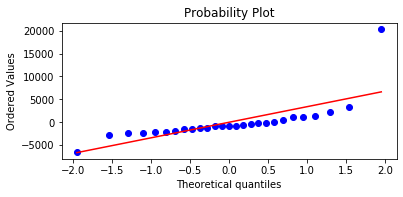

In [120]:
#Normality
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(model3.resid, plot=ax, fit=True);       

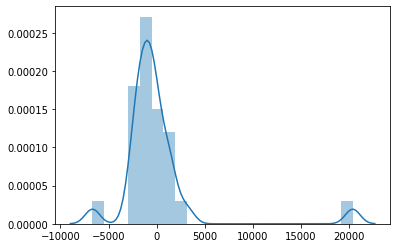

In [100]:
sns.distplot(model3.resid, hist=True, kde=True);

#### Multicolleniarity (VIF)

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
x.values

array([[1.00000000e+00, 1.62896760e+05, 1.54000000e+00, 7.70968990e+05,
        1.62896760e+05, 6.45289970e+05, 8.41029000e+03, 5.32400000e+03,
        9.93190000e+04],
       [1.00000000e+00, 1.44628540e+05, 0.00000000e+00, 1.14750231e+06,
        1.44628540e+05, 9.93702880e+05, 4.43191000e+03, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 3.79933100e+04, 1.00000000e+00, 2.62820520e+05,
        3.79933100e+04, 2.19748190e+05, 1.62313000e+03, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.47954130e+05, 2.00000000e+00, 6.40104940e+05,
        1.47954130e+05, 5.71424160e+05, 4.31290000e+03, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 6.07535500e+04, 9.10000000e-01, 2.02039810e+05,
        6.07535500e+04, 2.06783170e+05, 1.82011000e+03, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 1.63791800e+04, 5.80000000e-01, 5.70815000e+04,
        1.63791800e+04, 6.66299500e+04, 3.68770000e+02, 1.01800000e+03,
        3.9

In [108]:
x.shape[1]

9

In [111]:
x.columns

Index(['const', 'Borrowings', 'NetNPA(%)', 'Deposits', 'Borrowings',
       'Advances', 'FixedAssets', 'NumberofBranches', 'NumberofEmployees'],
      dtype='object')

In [109]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

,vif_factor
0,1.743260
1,inf
2,1.037367
3,1095.350157
4,inf
5,929.410633
6,59.839319
7,7.131786
8,7.597324


In [122]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif_factor,features
0,1.717844,const
1,27.175349,Borrowings
2,1.035615,NetNPA(%)
3,1013.993109,Deposits
4,877.403371,Advances
5,55.363950,FixedAssets
6,1.220090,NumberofBranches


In [123]:
x = bank20[['Borrowings','NetNPA(%)','Advances','FixedAssets','NumberofBranches']]

In [124]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif_factor,features
0,13.530968,Borrowings
1,1.017089,NetNPA(%)
2,34.080165,Advances
3,13.381002,FixedAssets
4,1.320449,NumberofBranches


In [125]:
x = bank20[['Borrowings','NetNPA(%)','FixedAssets','NumberofBranches']]
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif_factor,features
0,4.505474,Borrowings
1,1.016737,NetNPA(%)
2,4.114804,FixedAssets
3,1.215203,NumberofBranches


In [126]:
x = sm.add_constant(x)
model4 = sm.OLS(y,x).fit()

C:\Users\veda\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [127]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetProfit_LossforTheYear   R-squared:                       0.342
Model:                                  OLS   Adj. R-squared:                  0.222
Method:                       Least Squares   F-statistic:                     2.856
Date:                      Sat, 29 Jun 2024   Prob (F-statistic):             0.0478
Time:                              15:46:25   Log-Likelihood:                -271.59
No. Observations:                        27   AIC:                             553.2
Df Residuals:                            22   BIC:                             559.7
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -192.0176   1562.977     -0.123      0.903   -3433.433    3049.398
Borrowings           0.1006      0.030      3.305      0.003       0.037       0.164
NetNPA(%)            0.0022      0.026      0.083      0.934      -0.052       0.056
FixedAssets         -0.8603      0.287     -2.993      0.007      -1.456      -0.264
NumberofBranches    -0.5131      0.999     -0.514      0.613      -2.584       1.558
==============================================================================
Omnibus:                       25.656   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.009
Skew:                           1.883   Prob(JB):                     5.09e-12
Kurtosis:                       8.661   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
bank19 = bank[bank['Year']==2019]

In [134]:
x = bank19[['Borrowings','NetNPA','FixedAssets','NumberofBranches']]
y = bank19['NetProfit_LossforTheYear']

In [135]:
x = sm.add_constant(x)
model6 = sm.OLS(y,x).fit()
#model6.summary()

In [136]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     NetProfit_LossforTheYear   R-squared:                       0.356
Model:                                  OLS   Adj. R-squared:                  0.239
Method:                       Least Squares   F-statistic:                     3.039
Date:                      Sat, 29 Jun 2024   Prob (F-statistic):             0.0389
Time:                              15:52:27   Log-Likelihood:                -269.07
No. Observations:                        27   AIC:                             548.1
Df Residuals:                            22   BIC:                             554.6
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1649.0332   1888.967      0.873      0.392   -2268.445    5566.512
Borrowings           0.0696      0.028      2.485      0.021       0.012       0.128
NetNPA              -0.0153      0.032     -0.485      0.633      -0.081       0.050
FixedAssets         -0.9104      0.320     -2.849      0.009      -1.573      -0.248
NumberofBranches    -0.4489      0.539     -0.833      0.414      -1.567       0.669
==============================================================================
Omnibus:                       25.568   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.948
Skew:                           2.038   Prob(JB):                     2.86e-10
Kurtosis:                       7.738   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
x = bank19[['Borrowings','NetNPA','FixedAssets','NumberofBranches']]
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,vif_factor,features
0,5.472892,Borrowings
1,1.228778,NetNPA
2,5.937413,FixedAssets
3,1.243932,NumberofBranches


### Summarising 
#### Food Basket across income category
#### Food Basket across states
#### Correlation
#### Simple Linear Regression
#### Multiple Linear Regression
#### Test for heteroscedasticity
#### Test for multicolleniarity (VIF) test
